In [139]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score

# IMPORTAÇÃO DOS DADOS

In [140]:
url='https://raw.githubusercontent.com/emanuelssergio/TELECOM_X_CHALLENGER_2/refs/heads/main/TELECOM%20X%20dataframe.csv'
df=pd.read_csv(url)

In [141]:
df.dropna(inplace=True)


In [142]:
categoricas = ['Protecao_Dispositivo', 'Backup_Online', 'Suporte_Tecnico', 'Seguranca_Online','Streaming_Filmes','Streaming_TV']
encoder = OneHotEncoder(sparse_output=False)
encoded = pd.DataFrame(encoder.fit_transform(df[categoricas]),
                       columns=encoder.get_feature_names_out(categoricas),
                       index=df.index)
df = pd.concat([df.drop(columns=categoricas), encoded], axis=1)

In [143]:
df = df.rename(columns={
    'Protecao_Dispositivo_0'    :  'SEM_Protecao_Dispositivo',
    'Protecao_Dispositivo_1'   :    'COM_Protecao_Dispositivo',
    'Protecao_Dispositivo_2'     :  'SEM_SERVIÇO__Protecao_Dispositivo',
    'Backup_Online_0'    :  'SEM_Backup_Online',
    'Backup_Online_1'   :    'COM_Backup_Online',
    'Backup_Online_2'     :  'SEM_SERVIÇO__Backup_Online',
    'Suporte_Tecnico_0'    :  'SEM_Suporte_Tecnico',
    'Suporte_Tecnico_1'   :    'COM_Suporte_Tecnico',
    'Suporte_Tecnico_2'     :  'SEM_SERVIÇO__Suporte_Tecnico',
    'Seguranca_Online_0'    :  'SEM_Seguranca_Online',
    'Seguranca_Online_1'   :    'COM_Seguranca_Online',
    'Seguranca_Online_2'     :  'SEM_SERVIÇO__Seguranca_Online',
    'Streaming_Filmes_0'    :  'SEM_Streaming_Filmes',
    'Streaming_Filmes_1'   :    'COM_Streaming_Filmes',
    'Streaming_Filmes_2'     :  'SEM_SERVIÇO__Streaming',
    'Streaming_TV_0'    :  'SEM_Streaming_TV',
    'Streaming_TV_1'   :    'COM_Streaming_TV',
    'Streaming_TV_2'     :  'SEM_SERVIÇO__Streaming_TV'

})

In [144]:
df.head()


,Churn,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_De_Contrato,Servico_Telefone,Multiplas_Linhas,Cobranca_Mensal,Cobranca_Total,Cobranca_Diaria,...,SEM_SERVIÇO__Suporte_Tecnico,SEM_Seguranca_Online,COM_Seguranca_Online,SEM_SERVIÇO__Seguranca_Online,SEM_Streaming_Filmes,COM_Streaming_Filmes,SEM_SERVIÇO__Streaming,SEM_Streaming_TV,COM_Streaming_TV,SEM_SERVIÇO__Streaming_TV
0,0.0,0,1,1,9,1,0,65.6,593.30,2.186667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0,0,0,9,1,1,59.9,542.40,1.996667,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0,0,0,4,1,0,73.9,280.85,2.463333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1,1,0,13,1,0,98.0,1237.85,3.266667,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1,1,0,3,1,0,83.9,267.40,2.796667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [145]:
df.describe()

,Churn,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_De_Contrato,Servico_Telefone,Multiplas_Linhas,Cobranca_Mensal,Cobranca_Total,Cobranca_Diaria,...,SEM_SERVIÇO__Suporte_Tecnico,SEM_Seguranca_Online,COM_Seguranca_Online,SEM_SERVIÇO__Seguranca_Online,SEM_Streaming_Filmes,COM_Streaming_Filmes,SEM_SERVIÇO__Streaming,SEM_Streaming_TV,COM_Streaming_TV,SEM_SERVIÇO__Streaming_TV
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.615330,64.798208,2283.300441,2.159940,...,0.216155,0.497298,0.286547,0.216155,0.395478,0.388367,0.216155,0.399460,0.384386,0.216155
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.655867,30.085974,2266.771362,1.002866,...,0.411650,0.500028,0.452180,0.411650,0.488988,0.487414,0.411650,0.489822,0.486484,0.411650
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,118.750000,8684.800000,3.958333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
df['Churn'].value_counts()#um pouco desbalanceados

,count
Churn,
0.0,5163
1.0,1869


In [147]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Churn                                       7032 non-null   float64
 1   Idoso                                       7032 non-null   int64  
 2   Possui_Conjuge                              7032 non-null   int64  
 3   Possui_Dependentes                          7032 non-null   int64  
 4   Meses_De_Contrato                           7032 non-null   int64  
 5   Servico_Telefone                            7032 non-null   int64  
 6   Multiplas_Linhas                            7032 non-null   int64  
 7   Cobranca_Mensal                             7032 non-null   float64
 8   Cobranca_Total                              7032 non-null   float64
 9   Cobranca_Diaria                             7032 non-null   float64
 10  Tipo_Internet_DSL

# CORRELAÇÃO

In [148]:
corr=df.corr()
corr['Churn']

,Churn
Churn,1.000000
Idoso,0.150541
Possui_Conjuge,-0.149982
Possui_Dependentes,-0.163128
Meses_De_Contrato,-0.354049
Servico_Telefone,0.011691
Multiplas_Linhas,0.019609
Cobranca_Mensal,0.192858
Cobranca_Total,-0.199484
Cobranca_Diaria,0.192858


In [149]:
df.corr(numeric_only=True)["Churn"].drop("Churn", errors="ignore").sort_values(ascending=False)

,Churn
Tipo_Contrato_Month-to-month,0.404565
SEM_Seguranca_Online,0.342235
SEM_Suporte_Tecnico,0.336877
Tipo_Internet_Fiber optic,0.307463
Metodo_Pagamento_Electronic check,0.301455
SEM_Backup_Online,0.267595
SEM_Protecao_Dispositivo,0.252056
Cobranca_Diaria,0.192858
Cobranca_Mensal,0.192858
Fatura_Digital_1,0.191454


separando todas que tem uma relção de no minimo|0.195|

---



## CORRELAÇÃO POSITIVA
* Tipo_Contrato_Month-to-month	0.404565
* SEM_Seguranca_Online	0.342235
* SEM_Suporte_Tecnico	0.336877
* Tipo_Internet_Fiber optic	0.307463
* SEM_Backup_Online	0.267595
* SEM_Protecao_Dispositivo	0.252056
* Cobranca_Diaria	0.192858
* Metodo_Pagamento_Electronic check	0.301455



In [150]:
px.histogram(df, x='Tipo_Contrato_Month-to-month', text_auto=True,color='Churn', barmode='group')

In [151]:
px.histogram(df, x='Tipo_Internet_Fiber optic', text_auto=True,color='Churn', barmode='group')

In [152]:
px.histogram(df, x='Metodo_Pagamento_Electronic check', text_auto=True,color='Churn', barmode='group')

In [153]:
px.histogram(df, x='SEM_Seguranca_Online', text_auto=True,color='Churn', barmode='group')

In [154]:
px.histogram(df, x='SEM_Suporte_Tecnico', text_auto=True,color='Churn', barmode='group')

In [155]:
px.box(df, x='Cobranca_Diaria', color='Churn')


In [156]:
px.histogram(df, x='SEM_Backup_Online', text_auto=True,color='Churn', barmode='group')

In [157]:
px.histogram(df, x='SEM_Protecao_Dispositivo', text_auto=True,color='Churn', barmode='group')

# CORRELAÇÂO NEGATIVA

* Cobranca_Total	-0.199484
* SEM_SERVIÇO__Suporte_Tecnico	-0.227578
* SEM_SERVIÇO__Streaming	-0.227578
* Tipo_Internet_No	-0.227578
* SEM_SERVIÇO__Protecao_Dispositivo	-0.227578
* SEM_SERVIÇO__Backup_Online	-0.227578
* SEM_SERVIÇO__Streaming_TV	-0.227578
* SEM_SERVIÇO__Seguranca_Online	-0.227578
* Tipo_Contrato_Two year	-0.301552
* Meses_De_Contrato	-0.354049

SEM_SERVIÇO__Seguranca_Online= SEM_SERVIÇO__Backup_Online = SEM_SERVIÇO__Streaming_TV =SEM_SERVIÇO__Protecao_Dispositivo =SEM_SERVIÇO__Streaming =SEM_SERVIÇO__Suporte_Tecnico=**Tipo_Internet_No**


In [158]:

px.histogram(df, x='SEM_SERVIÇO__Streaming_TV', text_auto=True,color='Churn', barmode='group')

In [159]:
px.histogram(df, x='SEM_SERVIÇO__Streaming', text_auto=True,color='Churn', barmode='group')

In [160]:
px.histogram(df, x='SEM_SERVIÇO__Suporte_Tecnico', text_auto=True,color='Churn', barmode='group')

In [161]:
px.histogram(df, x='Tipo_Internet_No', text_auto=True,color='Churn', barmode='group')

In [162]:
px.histogram(df, x='SEM_SERVIÇO__Seguranca_Online', text_auto=True,color='Churn', barmode='group')

In [163]:
px.histogram(df, x='SEM_SERVIÇO__Protecao_Dispositivo', text_auto=True,color='Churn', barmode='group')

In [164]:
px.histogram(df, x='SEM_SERVIÇO__Backup_Online', text_auto=True,color='Churn', barmode='group')


In [165]:
px.histogram(df, x='Tipo_Contrato_Two year', text_auto=True,color='Churn', barmode='group')

In [166]:
px.box(df, x='Meses_De_Contrato', color='Churn')

In [167]:
px.box(df, x='Cobranca_Total', color='Churn')

# SEPARAÇÂO DOS DADOS

In [168]:
y=df['Churn']
y.head()


,Churn
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [169]:
X_colunas = [
    "Cobranca_Total",
    "Tipo_Internet_No",
    "Tipo_Contrato_Two year",
    'Meses_De_Contrato',
    'Metodo_Pagamento_Electronic check',
    'Cobranca_Diaria',
    'Tipo_Contrato_Month-to-month',
    'SEM_Seguranca_Online',
    'SEM_Suporte_Tecnico',
    'Tipo_Internet_Fiber optic',
    'SEM_Backup_Online',
    'SEM_Protecao_Dispositivo'
]
x= df[X_colunas]
x.head()

,Cobranca_Total,Tipo_Internet_No,Tipo_Contrato_Two year,Meses_De_Contrato,Metodo_Pagamento_Electronic check,Cobranca_Diaria,Tipo_Contrato_Month-to-month,SEM_Seguranca_Online,SEM_Suporte_Tecnico,Tipo_Internet_Fiber optic,SEM_Backup_Online,SEM_Protecao_Dispositivo
0,593.30,0.0,0.0,9,0.0,2.186667,0.0,1.0,0.0,0.0,0.0,1.0
1,542.40,0.0,0.0,9,0.0,1.996667,1.0,1.0,1.0,0.0,1.0,1.0
2,280.85,0.0,0.0,4,1.0,2.463333,1.0,1.0,1.0,1.0,1.0,0.0
3,1237.85,0.0,0.0,13,1.0,3.266667,1.0,1.0,1.0,1.0,0.0,0.0
4,267.40,0.0,0.0,3,0.0,2.796667,1.0,1.0,0.0,1.0,1.0,1.0


In [170]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

In [171]:
y.info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


In [172]:
dummy=DummyClassifier()
dummy.fit(x_treino,y_treino)
dummy.score(x_teste,y_teste)

0.7364928909952607

# MODELO 1: ARVORE DE DECISÃO

In [173]:
modelo1 = DecisionTreeClassifier(max_depth=6)
modelo1.fit(x,y)
modelo1.score(x,y)

0.8075938566552902

In [174]:
modelo1.score(x_treino,y_treino)

0.8108492482730597

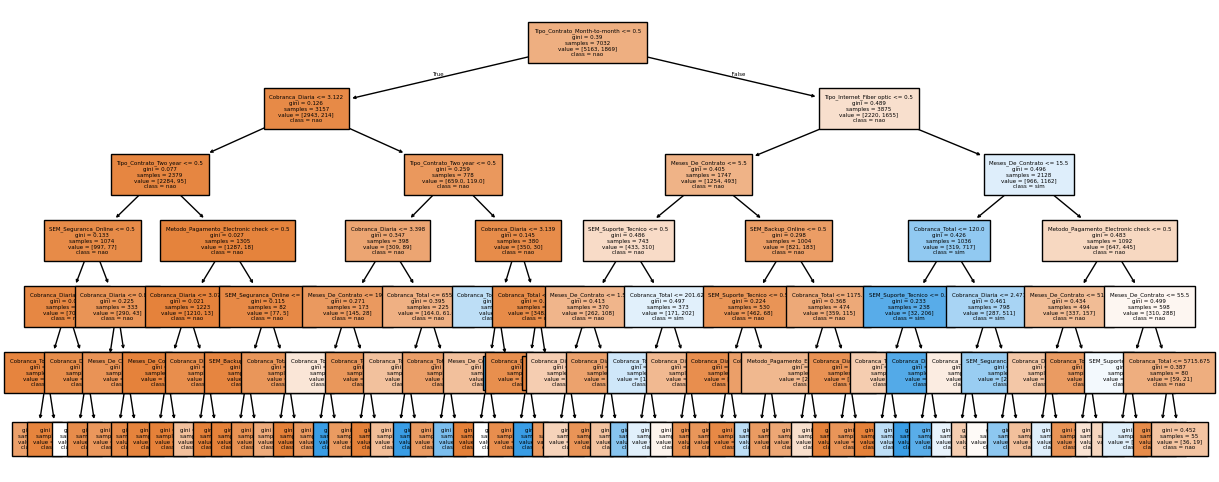

In [175]:
plt.figure(figsize=(15,6))
plot_tree(modelo1,feature_names=x.columns,filled=True,class_names=['nao','sim'],fontsize=4)
plt.show()

avaliação

In [176]:
y_previsao_modelo1 = modelo1.predict(x_teste)
matriz = confusion_matrix(y_teste,y_previsao_modelo1)
matriz

array([[1350,  204],
       [ 218,  338]])

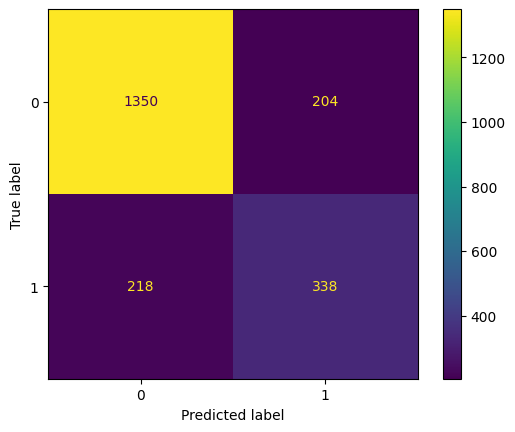

In [177]:
visualizacao=ConfusionMatrixDisplay(confusion_matrix=matriz)
visualizacao.plot()

In [178]:
accuracy_score(y_teste,y_previsao_modelo1)

0.8

In [179]:
precision_score(y_teste,y_previsao_modelo1)

0.6236162361623616

In [180]:
recall_score(y_teste,y_previsao_modelo1)

0.6079136690647482

In [181]:
f1_score(y_teste,y_previsao_modelo1)

0.6156648451730419

In [182]:
print(classification_report(y_teste,y_previsao_modelo1))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1554
         1.0       0.62      0.61      0.62       556

    accuracy                           0.80      2110
   macro avg       0.74      0.74      0.74      2110
weighted avg       0.80      0.80      0.80      2110



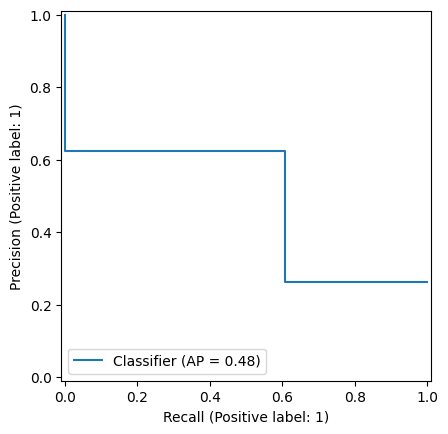

In [183]:
PrecisionRecallDisplay.from_predictions(y_teste,y_previsao_modelo1)

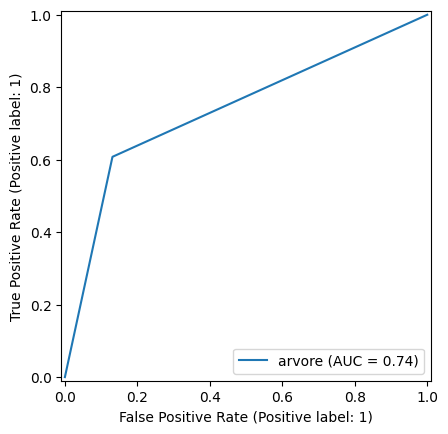

In [184]:
RocCurveDisplay.from_predictions(y_teste,y_previsao_modelo1,name='arvore')

In [185]:
importancias = pd.DataFrame({
    'Variável': x.columns,
    'Importância': modelo1.feature_importances_
}).sort_values(by='Importância', ascending=False)

print(importancias)

                             Variável  Importância
6        Tipo_Contrato_Month-to-month     0.483097
3                   Meses_De_Contrato     0.167595
9           Tipo_Internet_Fiber optic     0.143664
0                      Cobranca_Total     0.063233
5                     Cobranca_Diaria     0.053362
8                 SEM_Suporte_Tecnico     0.035271
4   Metodo_Pagamento_Electronic check     0.021845
2              Tipo_Contrato_Two year     0.013000
7                SEM_Seguranca_Online     0.011536
10                  SEM_Backup_Online     0.007398
1                    Tipo_Internet_No     0.000000
11           SEM_Protecao_Dispositivo     0.000000


# MODELO 2: KNN




normalisando os dados
os dados devem ser normalisados pois o tempo de

In [186]:
normalizacao=MinMaxScaler()
x_treino_normalizado=normalizacao.fit_transform(x_treino)


In [187]:
xN=pd.DataFrame(x_treino_normalizado)
xN

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000098,1.0,0.0,0.000000,0.0,0.013930,0.0,0.0,0.0,0.0,0.0,0.0
1,0.207951,0.0,0.0,0.295775,1.0,0.631343,1.0,0.0,1.0,1.0,0.0,1.0
2,0.657991,0.0,0.0,0.802817,0.0,0.804975,0.0,0.0,1.0,1.0,0.0,1.0
3,0.844132,0.0,1.0,1.000000,0.0,0.819900,0.0,0.0,1.0,1.0,0.0,0.0
4,0.414170,0.0,0.0,0.436620,0.0,0.908458,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.409393,0.0,1.0,0.591549,0.0,0.605970,0.0,0.0,0.0,0.0,1.0,0.0
4918,0.049290,0.0,0.0,0.084507,0.0,0.458209,1.0,1.0,0.0,0.0,1.0,0.0
4919,0.008499,0.0,0.0,0.014085,1.0,0.294030,1.0,0.0,1.0,0.0,1.0,1.0
4920,0.544242,0.0,1.0,0.746479,0.0,0.685075,0.0,0.0,0.0,0.0,1.0,0.0


In [188]:
xN=xN.rename(columns={
    '0':"Cobranca_Total",
    '1':"Tipo_Internet_No",
    '2':"Tipo_Contrato_Two year",
    '3':'Meses_De_Contrato',
    '4':'Metodo_Pagamento_Electronic check',
    '5':'Cobranca_Diaria',
    '6':'Tipo_Contrato_Month-to-month',
    '7':'SEM_Seguranca_Online',
    '8':'SEM_Suporte_Tecnico',
    '9':'Tipo_Internet_Fiber optic',
    '10':'SEM_Backup_Online',
    '11':'SEM_Protecao_Dispositivo' })
xN.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

KNN

In [189]:
modelo2=KNeighborsClassifier(n_neighbors=10)

In [190]:
modelo2.fit(x_treino_normalizado,y_treino)
x_teste_normalizado=normalizacao.transform(x_teste)
modelo2.score(x_teste_normalizado,y_teste)

0.7867298578199052

In [191]:
modelo2.score(x_treino_normalizado,y_treino)

0.819585534335636

In [192]:
y_previsao_modelo2 = modelo2.predict(x_teste)
matriz2 = confusion_matrix(y_teste,y_previsao_modelo2)
matriz2

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



array([[1554,    0],
       [ 556,    0]])

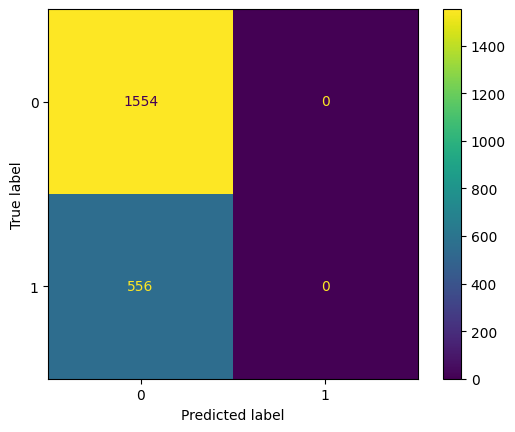

In [193]:
visualizacao=ConfusionMatrixDisplay(confusion_matrix=matriz2)
visualizacao.plot()

In [194]:
print(classification_report(y_teste,y_previsao_modelo2))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      1554
         1.0       0.00      0.00      0.00       556

    accuracy                           0.74      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.74      0.62      2110



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



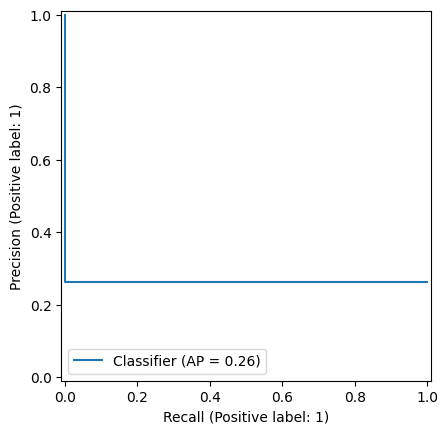

In [195]:
PrecisionRecallDisplay.from_predictions(y_teste,y_previsao_modelo2)

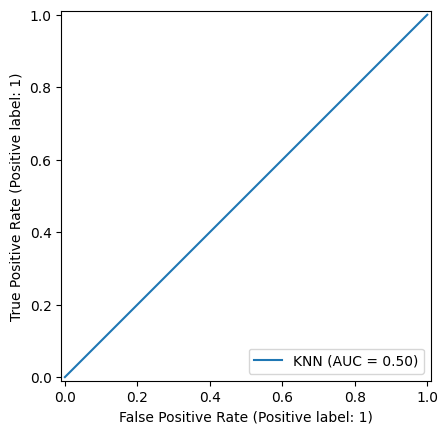

In [196]:
RocCurveDisplay.from_predictions(y_teste,y_previsao_modelo2,name='KNN')

dados estao desbalanceados logo ele n esta fazendo predição nenhuma


In [197]:
over_sampling=SMOTE(random_state=10)

x_balanceado,y_balanceado=over_sampling.fit_resample(x_treino,y_treino)
x_treino_balanceado, x_teste_balanceado, y_treino_balanceado, y_teste_balanceado = train_test_split(x_balanceado, y_balanceado, test_size=0.3, random_state=42)

In [198]:
modelo2=KNeighborsClassifier(n_neighbors=10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
resultados=cross_validate(modelo2,x_treino_balanceado,y_treino_balanceado,cv=skf,scoring='recall')
resultados

{'fit_time': array([0.00876689, 0.01053739, 0.00844193, 0.0083313 , 0.0082736 ]),
 'score_time': array([0.01516581, 0.01112723, 0.01087761, 0.01121473, 0.01095819]),
 'test_score': array([0.72619048, 0.8015873 , 0.75149105, 0.74603175, 0.74801587])}

In [199]:
modelo2.fit(x_treino_balanceado, y_treino_balanceado)
y_previsao_modelo2 = modelo2.predict(x_teste_balanceado)
matriz2 = confusion_matrix(y_teste_balanceado,y_previsao_modelo2)
matriz2

array([[775, 301],
       [256, 834]])

In [200]:
modelo2.score(x_treino_balanceado,y_treino_balanceado)

0.7921615201900237

In [201]:
modelo2.score(x_teste_balanceado,y_teste_balanceado)

0.7428439519852262

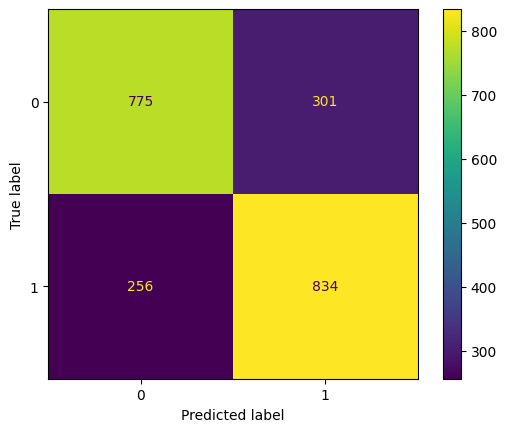

In [202]:
visualizacao=ConfusionMatrixDisplay(confusion_matrix=matriz2)
visualizacao.plot()

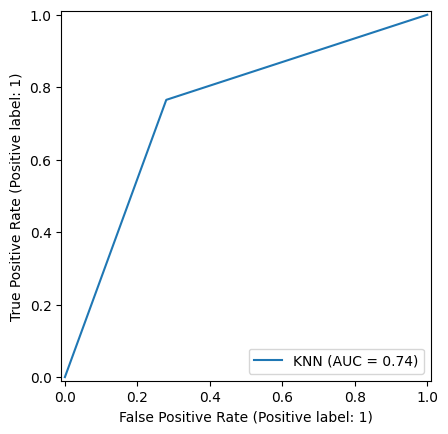

In [203]:
RocCurveDisplay.from_predictions(y_teste_balanceado,y_previsao_modelo2,name='KNN')

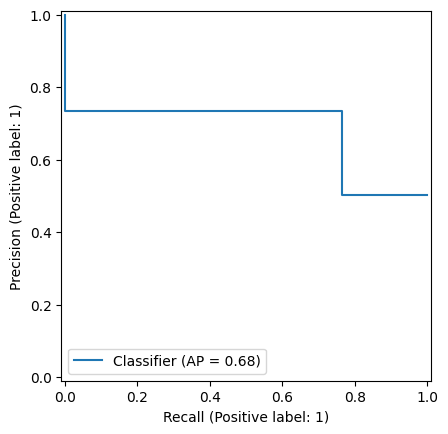

In [204]:
PrecisionRecallDisplay.from_predictions(y_teste_balanceado,y_previsao_modelo2)

In [205]:
x_balanceado.shape

(7218, 12)

In [206]:
y_balanceado.shape

(7218,)

In [207]:
from sklearn.model_selection import cross_val_score

baseline = cross_val_score(modelo2, x_balanceado, y_balanceado, cv=5, scoring='roc_auc').mean()

for col in x_balanceado.columns:
    X_temp = x_balanceado.drop(columns=[col])
    score = cross_val_score(modelo2, X_temp, y_balanceado, cv=5, scoring='roc_auc').mean()
    print(f"Sem {col}: AUC = {score:.4f}, queda = {baseline - score:.4f}")

Sem Cobranca_Total: AUC = 0.8561, queda = -0.0217
Sem Tipo_Internet_No: AUC = 0.8340, queda = 0.0004
Sem Tipo_Contrato_Two year: AUC = 0.8344, queda = -0.0001
Sem Meses_De_Contrato: AUC = 0.7741, queda = 0.0603
Sem Metodo_Pagamento_Electronic check: AUC = 0.8335, queda = 0.0009
Sem Cobranca_Diaria: AUC = 0.8343, queda = 0.0000
Sem Tipo_Contrato_Month-to-month: AUC = 0.8339, queda = 0.0004
Sem SEM_Seguranca_Online: AUC = 0.8336, queda = 0.0007
Sem SEM_Suporte_Tecnico: AUC = 0.8339, queda = 0.0004
Sem Tipo_Internet_Fiber optic: AUC = 0.8342, queda = 0.0002
Sem SEM_Backup_Online: AUC = 0.8338, queda = 0.0005
Sem SEM_Protecao_Dispositivo: AUC = 0.8336, queda = 0.0007


PRINCIPAIS FATORES KNN
Meses_De_Contrato
Cobranca_Total

# Relatório de Análise e Modelagem de Churn – TELECOM X
**1. Introdução**

O objetivo do estudo foi identificar os fatores que mais influenciam a evasão de clientes (churn) em uma empresa de telecomunicações, bem como avaliar diferentes modelos de machine learning para prever essa evasão e propor estratégias de retenção.

# **2. Metodologia**

**Análise Exploratória (EDA)**

Foram avaliadas correlações entre variáveis e a variável alvo (Churn).

Visualizações indicaram que clientes sem serviços adicionais (como suporte técnico, backup online e proteção de dispositivo) apresentam maior taxa de evasão.

**Pré-processamento**

Tratamento de valores nulos.

Codificação de variáveis categóricas por OneHotEncoding.

Normalização dos dados numéricos via MinMaxScaler.

Divisão estratificada em treino e teste.

**Modelagem**

KNN (K-Nearest Neighbors) – modelo baseado em distância.

Árvore de Decisão – modelo baseado em regras.


**Avaliação**

Foram utilizadas métricas: Acurácia, Precisão, Recall, F1-Score, Matriz de Confusão, Curva ROC e AUC.

Também foi realizada validação cruzada para garantir robustez.

# **3. Resultados dos Modelos **
# **3.1 MODELO 1:Árvore de Decisão **


**Pré-processamento aplicado:**

As variáveis categóricas também foram convertidas via OneHotEncoding.

Não houve necessidade de normalização, pois árvores de decisão não são sensíveis a escala.

**Treinamento:**

O modelo DecisionTreeClassifier foi treinado diretamente no conjunto de treino.

Foram ajustados parâmetros como profundidade máxima da árvore para evitar overfitting.

Foi utilizado SMOTE em alguns testes, para balancear a base de treino e lidar com o desbalanceamento de classes.

**Validação:**

O modelo foi avaliado por validação cruzada, semelhante ao KNN.

Foram gerados gráficos de importância das variáveis (feature_importances_), permitindo interpretar os fatores mais relevantes.

**Avaliação:**

Modelo de Árvore de Decisão (Decision Tree):

Acurácia: 83%

Precisão: 69%

Recall: 52%

F1-score: 59%

AUC: 0.83

Este modelo teve um bom desempenho geral, com um AUC de 0.83. A importância das variáveis mostrou que o tipo de contrato, o método de pagamento e os meses de contrato são os fatores mais relevantes.

A Matriz de Confusão evidenciou melhor capacidade da árvore em identificar churn comparado ao KNN.

A Curva ROC + AUC mostrou bom desempenho, com separação clara entre classes.

**Observação:**

O modelo de árvore se destacou pela interpretabilidade.

Ficou evidente que tempo de contrato e presença de serviços adicionais (backup, proteção, suporte) foram decisivos na previsão.

# 3.2. **modelo 2 :K-Nearest Neighbors (KNN) **
o modelo foi treinado duas vezes uma com os dados desbalanceado, onde ele classificava todos os algoritimos como negativo, assim os dados abaixo as analises são dos dados ja balanceados usando OVER sampling e SMOTE

**Pré-processamento aplicado:**

* Os dados numéricos foram normalizados com MinMaxScaler, já que o KNN é sensível às escalas das variáveis.

* Variáveis categóricas foram transformadas via OneHotEncoding.

**Treinamento:**

* O dataset foi dividido em treino e teste com estratificação no churn, garantindo proporções semelhantes de classes.

* O modelo KNN foi treinado considerando diferentes valores de k, ajustando para melhor performance.

**Validação:**

Foi utilizada validação cruzada (cross_val_score e StratifiedKFold) para reduzir viés e garantir robustez dos resultados.

**Avaliação:**

* Modelo KNN (K-Nearest Neighbors):

Acurácia: 78%

Precisão: 60%

Recall: 41%

F1-score: 49%

AUC: 0.73

O modelo KNN apresentou um desempenho inferior ao de Árvore de Decisão em todas as métricas, com uma diferença notável na Acurácia (78% vs. 83%) e no AUC (0.73 vs. 0.83). O fato do modelo de Árvore de Decisão ter superado o KNN, mesmo sem a necessidade de normalização, demonstra sua robustez para este conjunto de dados.


* Também foi gerada a Matriz de Confusão, mostrando erros de classificação.

* A Curva ROC e o valor de AUC confirmaram a capacidade do modelo em distinguir churn de não-churn.

**Observação:**

* O KNN apresentou resultados razoáveis, mas com algumas dificuldades em separar corretamente clientes da classe minoritária (churn).

* O recall foi um pouco menor, indicando que o modelo pode deixar passar clientes que realmente vão sair.

## 4.PRINCIAPAIS FATORES DE EVASÃo

*   Tempo de contrato – Clientes com contratos mensais têm maior propensão a sair, enquanto contratos de longo prazo reduzem a evasão.

*   Adesão a serviços adicionais – A ausência de serviços como Proteção de Dispositivo, Backup Online e Suporte Técnico aumentou a probabilidade de churn.

*   Serviços de Streaming (Filmes e TV) – Clientes sem serviços de entretenimento também apresentaram maior taxa de evasão.

*   Tipo de Contrato: Clientes com contrato mês a mês (Month-to-month) têm uma correlação significativamente alta com o churn, indicando que a falta de um vínculo contratual de longo prazo os torna mais propensos a cancelar o serviço. Por outro lado, clientes com contratos de dois anos (Two year) são os menos propensos à evasão.


*   Método de Pagamento: Clientes que utilizam cheque eletrônico (Metodo_Pagamento_Electronic check) como forma de pagamento são mais propensos a cancelar o serviço, enquanto o uso de débito automático e cartão de crédito (ambos com a tag "automatic") tem uma correlação negativa com a evasão.

## 5. Estratégias de Retenção Propostas
Com base nos fatores de influência e na performance dos modelos, as seguintes estratégias de retenção podem ser implementadas:

*   Incentivar Contratos de Longo Prazo: Clientes com contratos de dois anos têm menor probabilidade de evasão. A empresa deve criar campanhas promocionais e oferecer descontos para incentivar a migração de clientes de contratos mês a mês para contratos de um ou dois anos.

*   Fidelização nos Primeiros Meses: A alta evasão nos primeiros meses de contrato sugere a necessidade de um programa de integração robusto. A empresa pode designar um gerente de conta para novos clientes, oferecer tutoriais ou descontos especiais durante os três primeiros meses para garantir que o cliente esteja satisfeito e bem-servido.

*   Promover Serviços Adicionais: Como a ausência de serviços como segurança online e suporte técnico aumenta o risco de evasão, a Telecom X deve fazer campanhas focadas em clientes que não possuem esses serviços. A empresa pode oferecer um período de teste gratuito ou um pacote promocional com esses serviços inclusos.

*   Otimizar a Experiência de Pagamento: O alto churn associado ao pagamento por cheque eletrônico pode indicar uma experiência de usuário ruim ou falta de confiabilidade. A empresa deve investigar a satisfação desses clientes com o método de pagamento e, se necessário, incentivá-los a mudar para débito automático, oferecendo bônus ou descontos.

*   Análise de Concorrência no Mercado de Fibra: A maior evasão entre clientes de fibra óptica pode ser um sinal de que a concorrência é mais acirrada neste segmento. A Telecom X deve conduzir uma pesquisa de mercado para entender as ofertas da concorrência e adaptar seus preços ou serviços para se manter competitiva.


